## Preparation

##### Import Functions

In [1]:
from Scripts.LoadCSV import LoadCSV as LoadCSV
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Scripts.OptimizeBruteForceKFold import OptimizeBruteForceKFold as OptimizeBruteForceKFold
from Scripts.ValueTest import ValueTest as ValueTest
from Scripts.OptimizeBruteForce import OptimizeBruteForce as OptimizeBruteForce
from Class.Helper import Helper as Helper
import warnings
warnings.simplefilter("ignore")

import Settings.GeneralSettings as generalSettings

# import Settings.SettingsBreastCancerData as settings
# import Settings.SettingsBreastCancerWisconsin as settings
# import Settings.SettingsDataBanknoteAuthentication as settings
# import Settings.SettingsHaberman as settings
import Settings.SettingsHeart as settings
# import Settings.SettingsHTRU as settings
# import Settings.SettingsImmunotherapy as settings
# import Settings.SettingsIndianLiverPatient as settings
# import Settings.SettingsPimaIndians as settings

##### Load CSV File

In [2]:
if generalSettings.mode == 0:
    loadCSV = LoadCSV()
    samples_stats, train_stats, test_stats, train_samples = loadCSV.worker(settings.variables)

##### Fuzzify Data

In [3]:
if generalSettings.mode == 0:
    fuzzify = Fuzzify()
    changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters = fuzzify.worker(settings.variables, "", -1)

In [4]:
if generalSettings.mode == 0:
    helper = Helper()

    fuzzification_data = [settings.variables["dataset_name"], settings.variables["gausses"], samples_stats, train_stats, test_stats, changed_decisions, round(changed_decisions / train_samples, 2), implicants_number, settings.variables["feature_numbers"], features_number_after_reduct]
    helper.saveFuzzificationStats(fuzzification_data)

    fuzzification_parameters_data = [settings.variables["dataset_name"], settings.variables["gausses"], settings.sigma_mean_params] + fuzzify_parameters
    helper.saveFuzzificationParameters(fuzzification_parameters_data)

## Train Set - K-Fold

##### Train Set | K-Fold - S Function Optymalization

In [5]:
if generalSettings.mode == 1:
    optimizeBruteForceKFold = OptimizeBruteForceKFold(settings.variables, settings.s_function_width)

In [6]:
if generalSettings.mode == 1:
    best_s_function_center, mean_s_function_center = optimizeBruteForceKFold.worker(settings.variables, settings.constraints, settings.s_function_width, settings.n_folds)

## Test Set | K-Fold Test

In [7]:
if generalSettings.mode == 1:
    valueTest = ValueTest(settings.variables, settings.s_function_width, False)

##### K-Fold Test Set | S Function Value

In [8]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings.variables, best_s_function_center, "Test Value - K-Fold - Best Function Center")

In [9]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings.variables, mean_s_function_center, "Test Value - K-Fold - Average Function Center")

## Training Set

In [10]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest = ValueTest(settings.variables, settings.s_function_width, True)

##### Training Set | No Optymalization

-----------------------------------------------------------------------------------
Accuracy: 0.9958677685950413
Precision: [0.9924812 1.       ]
Recall: [1.         0.99090909]
F-Score: [0.99622642 0.99543379]
Support: [132 110]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 107.87528204917908
-----------------------------------------------------------------------------------


,F5,F4,F2,F11,F8,F3,F9,F7,F12,F10,F0,F6,Decision,Decision Fuzzy,Predicted Value
170,1,0.296804,0.666667,0.25,1,0.339623,0.0967742,0.541985,0.333333,0.5,0.5625,0,Zero,Zero,0.302768
281,1,0.178082,0,0,1,0.320755,0.16129,0.648855,0,0.5,0.479167,0.5,Zero,Zero,0.336952
234,0,0.447489,0,0.75,0,0.339623,0.387097,0.290076,0.666667,0.5,0.854167,0,Zero,Zero,0.34634
261,0,0.237443,0,0.25,0,0.169811,0,0.679389,0.666667,1,0.479167,0.5,Zero,Zero,0.34634
185,0,0.374429,0,0.25,0,0.169811,0,0.625954,0.666667,1,0.3125,0,Zero,Zero,0.34634
266,0,0.458904,0,0,1,0.811321,0.548387,0.351145,0.666667,0.5,0.541667,1,Zero,Zero,0.353656
291,0,0.438356,0,0.75,0,0.188679,0.709677,0.526718,0.333333,0,0.604167,1,Zero,Zero,0.353714
264,0,0.182648,0,0.25,1,0.150943,0,0.282443,0.666667,0.5,0.520833,0,Zero,Zero,0.353962
287,0,0.242009,0.333333,0.25,0,0.566038,0,0.709924,0.666667,1,0.583333,0,Zero,Zero,0.355045
238,0,0.406393,0,0.75,1,0.292453,0,0.694656,0.666667,1,1,0,Zero,Zero,0.361596


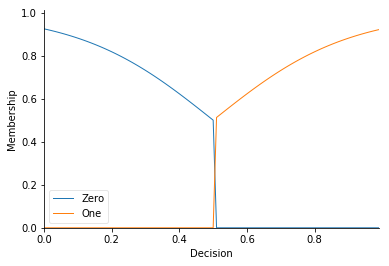

In [11]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest.noOptymalizationWorker(settings.variables)

##### Training Set | S Function Optymalization

In [12]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    optimizeBruteForce = OptimizeBruteForce(settings.variables, settings.s_function_width)

Accuracy: 0.9958677685950413
Precision: [0.9924812 1.       ]
Recall: [1.         0.99090909]
F-Score: [0.99622642 0.99543379]
Support: [132 110]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 4644.514095067978
-----------------------------------------------------------------------------------


,F9,F0,F11,F4,F3,F8,F5,F10,F2,F12,F6,F7,Decision,Decision Fuzzy,Predicted Value
170,0.0967742,0.5625,0.25,0.296804,0.339623,1,1,0.5,0.666667,0.333333,0,0.541985,Zero,Zero,0.302768
281,0.16129,0.479167,0,0.178082,0.320755,1,1,0.5,0,0,0.5,0.648855,Zero,Zero,0.336952
234,0.387097,0.854167,0.75,0.447489,0.339623,0,0,0.5,0,0.666667,0,0.290076,Zero,Zero,0.34634
261,0,0.479167,0.25,0.237443,0.169811,0,0,1,0,0.666667,0.5,0.679389,Zero,Zero,0.34634
185,0,0.3125,0.25,0.374429,0.169811,0,0,1,0,0.666667,0,0.625954,Zero,Zero,0.34634
266,0.548387,0.541667,0,0.458904,0.811321,1,0,0.5,0,0.666667,1,0.351145,Zero,Zero,0.353656
291,0.709677,0.604167,0.75,0.438356,0.188679,0,0,0,0,0.333333,1,0.526718,Zero,Zero,0.353714
264,0,0.520833,0.25,0.182648,0.150943,1,0,0.5,0,0.666667,0,0.282443,Zero,Zero,0.353962
287,0,0.583333,0.25,0.242009,0.566038,0,0,1,0.333333,0.666667,0,0.709924,Zero,Zero,0.355045
238,0,1,0.75,0.406393,0.292453,1,0,1,0,0.666667,0,0.694656,Zero,Zero,0.361596


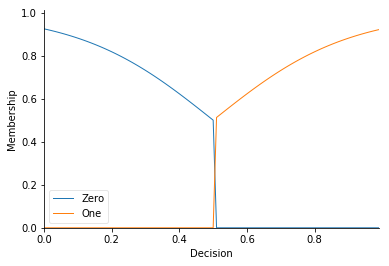

In [13]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    s_function_center = optimizeBruteForce.sFunctionsWorker(settings.variables, settings.constraints, settings.s_function_width)

##### Training Set | Threshold Optymalization

Accuracy: 0.9958677685950413
Precision: [0.9924812 1.       ]
Recall: [1.         0.99090909]
F-Score: [0.99622642 0.99543379]
Support: [132 110]
-----------------------------------------------------------------------------------
Center Point: 0.5
Threshold: 0.4867676649070391
Train Accuracy: 0.9958677685950413
Time: 118.18308544158936
-----------------------------------------------------------------------------------


,F9,F0,F11,F4,F3,F8,F5,F2,F10,F12,F6,F7,Decision,Decision Fuzzy,Predicted Value
170,0.0967742,0.5625,0.25,0.296804,0.339623,1,1,0.666667,0.5,0.333333,0,0.541985,Zero,Zero,0.302768
281,0.16129,0.479167,0,0.178082,0.320755,1,1,0,0.5,0,0.5,0.648855,Zero,Zero,0.336952
234,0.387097,0.854167,0.75,0.447489,0.339623,0,0,0,0.5,0.666667,0,0.290076,Zero,Zero,0.34634
261,0,0.479167,0.25,0.237443,0.169811,0,0,0,1,0.666667,0.5,0.679389,Zero,Zero,0.34634
185,0,0.3125,0.25,0.374429,0.169811,0,0,0,1,0.666667,0,0.625954,Zero,Zero,0.34634
266,0.548387,0.541667,0,0.458904,0.811321,1,0,0,0.5,0.666667,1,0.351145,Zero,Zero,0.353656
291,0.709677,0.604167,0.75,0.438356,0.188679,0,0,0,0,0.333333,1,0.526718,Zero,Zero,0.353714
264,0,0.520833,0.25,0.182648,0.150943,1,0,0,0.5,0.666667,0,0.282443,Zero,Zero,0.353962
287,0,0.583333,0.25,0.242009,0.566038,0,0,0.333333,1,0.666667,0,0.709924,Zero,Zero,0.355045
238,0,1,0.75,0.406393,0.292453,1,0,0,1,0.666667,0,0.694656,Zero,Zero,0.361596


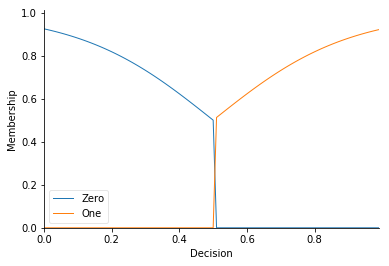

In [14]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    threshold = optimizeBruteForce.thresholdWorker(settings.variables, s_function_center, settings.s_function_width)

## Test Set

##### Test Set | No Optymalization 

-----------------------------------------------------------------------------------
Accuracy: 0.6721311475409836
Precision: [0.7826087  0.60526316]
Recall: [0.54545455 0.82142857]
F-Score: [0.64285714 0.6969697 ]
Support: [33 28]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 54.9628210067749
-----------------------------------------------------------------------------------


,F11,F2,F12,F3,F8,F4,F7,F10,F5,F6,F9,F0,Decision,Decision Fuzzy,Predicted Value
178,0,0,1,0.245283,1,0.116438,0.374046,0.5,0,0,0.403226,0.291667,Zero,Zero,0.428325
288,0.25,0,1,0.150943,1,0.477169,0.549618,0.5,0,0.5,0.483871,0.583333,Zero,Zero,0.467725
285,0.5,0,1,0.433962,1,0.422374,0.374046,0.5,0,0.5,0.290323,0.354167,Zero,Zero,0.467725
243,0.25,0,1,0.54717,1,0.3379,0.129771,0.5,0,0.5,0.193548,0.583333,Zero,Zero,0.467725
224,0.25,0,1,0.150943,1,0.257991,0.419847,0.5,0,0.5,0.451613,0.520833,Zero,Zero,0.467725
204,0.75,0,1,0.622642,0,0.086758,0.564885,0,0,0,1,0.6875,Zero,Zero,0.468262
268,0.5,0,0.666667,0.264151,1,0.365297,0.343511,0.5,0,0,0.516129,0.520833,Zero,Zero,0.471959
253,0.5,0,0.666667,0.0566038,1,0.394977,0.412214,0.5,0,0,0.145161,0.791667,Zero,Zero,0.48168
52,0.75,0.666667,1,0.339623,0,0.239726,0.572519,0.5,0,0.5,0.290323,0.6875,One,Zero,0.483559
289,0.25,0,1,0.320755,1,0.180365,0.450382,0.5,0,1,0.322581,0.541667,Zero,Zero,0.491511


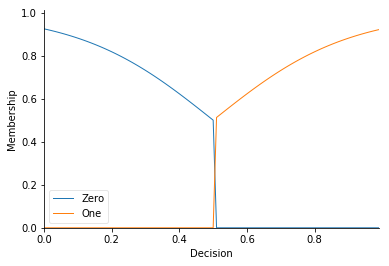

In [15]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest = ValueTest(settings.variables, settings.s_function_width, False)
    valueTest.noOptymalizationWorker(settings.variables)

##### Test Set | S Function Value

-----------------------------------------------------------------------------------
Accuracy: 0.6721311475409836
Precision: [0.7826087  0.60526316]
Recall: [0.54545455 0.82142857]
F-Score: [0.64285714 0.6969697 ]
Support: [33 28]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 59.2671685218811
-----------------------------------------------------------------------------------


,F11,F2,F12,F3,F8,F4,F7,F10,F5,F6,F9,F0,Decision,Decision Fuzzy,Predicted Value
178,0,0,1,0.245283,1,0.116438,0.374046,0.5,0,0,0.403226,0.291667,Zero,Zero,0.428325
288,0.25,0,1,0.150943,1,0.477169,0.549618,0.5,0,0.5,0.483871,0.583333,Zero,Zero,0.467725
285,0.5,0,1,0.433962,1,0.422374,0.374046,0.5,0,0.5,0.290323,0.354167,Zero,Zero,0.467725
243,0.25,0,1,0.54717,1,0.3379,0.129771,0.5,0,0.5,0.193548,0.583333,Zero,Zero,0.467725
224,0.25,0,1,0.150943,1,0.257991,0.419847,0.5,0,0.5,0.451613,0.520833,Zero,Zero,0.467725
204,0.75,0,1,0.622642,0,0.086758,0.564885,0,0,0,1,0.6875,Zero,Zero,0.468262
268,0.5,0,0.666667,0.264151,1,0.365297,0.343511,0.5,0,0,0.516129,0.520833,Zero,Zero,0.471959
253,0.5,0,0.666667,0.0566038,1,0.394977,0.412214,0.5,0,0,0.145161,0.791667,Zero,Zero,0.48168
52,0.75,0.666667,1,0.339623,0,0.239726,0.572519,0.5,0,0.5,0.290323,0.6875,One,Zero,0.483559
289,0.25,0,1,0.320755,1,0.180365,0.450382,0.5,0,1,0.322581,0.541667,Zero,Zero,0.491511


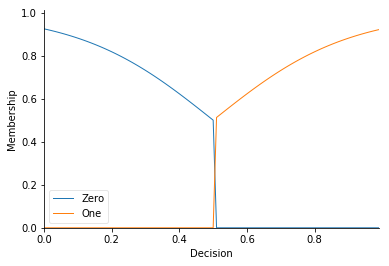

In [16]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.sOptymalizationWorker(settings.variables, s_function_center)

##### Test Set | Threshold Value

-----------------------------------------------------------------------------------
Accuracy: 0.6557377049180327
Precision: [0.61538462 0.88888889]
Recall: [0.96969697 0.28571429]
F-Score: [0.75294118 0.43243243]
Support: [33 28]
-----------------------------------------------------------------------------------
Center Point: 0.5
Threshold: 0.4867676649070391
Test Accuracy: 0.6557377049180327
Time: 62.456642150878906
-----------------------------------------------------------------------------------


,F11,F4,F2,F12,F3,F8,F0,F7,F10,F5,F6,F9,Decision,Decision Fuzzy,Predicted Value
178,0,0.116438,0,1,0.245283,1,0.291667,0.374046,0.5,0,0,0.403226,Zero,Zero,0.428325
288,0.25,0.477169,0,1,0.150943,1,0.583333,0.549618,0.5,0,0.5,0.483871,Zero,Zero,0.467725
285,0.5,0.422374,0,1,0.433962,1,0.354167,0.374046,0.5,0,0.5,0.290323,Zero,Zero,0.467725
243,0.25,0.3379,0,1,0.54717,1,0.583333,0.129771,0.5,0,0.5,0.193548,Zero,Zero,0.467725
224,0.25,0.257991,0,1,0.150943,1,0.520833,0.419847,0.5,0,0.5,0.451613,Zero,Zero,0.467725
204,0.75,0.086758,0,1,0.622642,0,0.6875,0.564885,0,0,0,1,Zero,Zero,0.468262
268,0.5,0.365297,0,0.666667,0.264151,1,0.520833,0.343511,0.5,0,0,0.516129,Zero,Zero,0.471959
253,0.5,0.394977,0,0.666667,0.0566038,1,0.791667,0.412214,0.5,0,0,0.145161,Zero,Zero,0.48168
52,0.75,0.239726,0.666667,1,0.339623,0,0.6875,0.572519,0.5,0,0.5,0.290323,One,Zero,0.483559
289,0.25,0.180365,0,1,0.320755,1,0.541667,0.450382,0.5,0,1,0.322581,Zero,One,0.491511


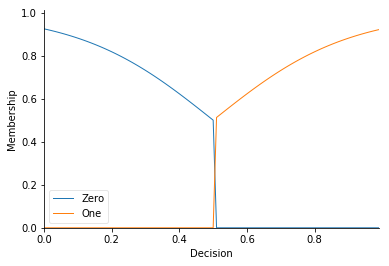

In [17]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.thresholdWorker(settings.variables, s_function_center, threshold)